## Wymagania

Aby uruchomić ten notebook, potrzebujesz następujących bibliotek:
- numpy
- pandas
- matplotlib
- requests
- beautifulsoup4
- plotly
- geopandas
- seaborn
- openpyxl

In [38]:
%pip install pandas
%pip install matplotlib
%pip install plotly
%pip install seaborn

You should consider upgrading via the 'c:\Users\UseresU\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\UseresU\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\UseresU\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\UseresU\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


## Importowanie bibliotek

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
import plotly.express as px

Dane zostały pobrane z https://injuryfacts.nsc.org/

In [40]:
prefix = 'data/'

In [41]:
cause_of_death_df = pd.read_excel(prefix+'All_leading_causes_of_death.xlsx', 'Total Leading Causes',skiprows=[0, 2992, 2993, 2994], usecols=lambda x: 'Unnamed' not in x,)
cause_of_death_df

,Year,Age Group,Rank,Cause of Death,Deaths,Rate (a)
0,2021,All Ages,1.0,Heart disease,695547,209.6
1,2021,All Ages,2.0,Cancer (malignant neoplasms),605213,182.4
2,2021,All Ages,3.0,COVID-19,416893,125.6
3,2021,All Ages,4.0,Preventable injury,224935,67.8
4,2021,All Ages,5.0,Stroke (cerebrovascular disease),162890,49.1
...,...,...,...,...,...,...
2985,1999,All Ages,6.0,Diabetes mellitus,68399,24.5
2986,1999,All Ages,7.0,Influenza and pneumonia,63730,22.8
2987,1999,All Ages,8.0,Alzheimer's disease,44536,16.0
2988,1999,All Ages,9.0,Nephritis,35525,12.7


In [42]:
cause_of_death_male_df = pd.read_excel(prefix+'All_leading_causes_of_death.xlsx', 'Male Leading Causes',skiprows=[0, 2992, 2993, 2994], usecols=lambda x: 'Unnamed' not in x,)
cause_of_death_male_df

,Year,Age Group,Rank,Cause of Death,Deaths,Rate (a)
0,2021,All Ages,1.0,Heart disease,384886,234.1
1,2021,All Ages,2.0,Cancer (malignant neoplasms),318670,193.9
2,2021,All Ages,3.0,COVID-19,236610,143.9
3,2021,All Ages,4.0,Preventable injury,149602,91.0
4,2021,All Ages,5.0,Stroke (cerebrovascular disease),70852,43.1
...,...,...,...,...,...,...
2985,1999,All Ages,6.0,Diabetes mellitus,31150,22.8
2986,1999,All Ages,7.0,Influenza and pneumonia,27718,20.3
2987,1999,All Ages,8.0,Suicide,23458,17.1
2988,1999,All Ages,9.0,Liver disease,17115,12.5


In [43]:
cause_of_death_female_df = pd.read_excel(prefix+'All_leading_causes_of_death.xlsx', 'Female Leading Causes',skiprows=[0, 2992, 2993, 2994], usecols=lambda x: 'Unnamed' not in x,)
cause_of_death_female_df

,Year,Age Group,Rank,Cause of Death,Deaths,Rate (a)
0,2021,All Ages,1.0,Heart disease,310661,185.5
1,2021,All Ages,2.0,Cancer (malignant neoplasms),286543,171.1
2,2021,All Ages,3.0,COVID-19,180283,107.6
3,2021,All Ages,4.0,Stroke (cerebrovascular disease),92038,54.9
4,2021,All Ages,5.0,Alzheimer's disease,82424,49.2
...,...,...,...,...,...,...
2985,1999,All Ages,6.0,Influenza and pneumonia,36012,25.3
2986,1999,All Ages,7.0,Preventable injury,34325,24.1
2987,1999,All Ages,8.0,Alzheimer's disease,31145,21.9
2988,1999,All Ages,9.0,Nephritis,18509,13.0


In [44]:
def plot_leading(chart_title, dataframe):
    fig = go.Figure()
    dataframe["Cause of Death"].replace({'Heart Disease': 'Heart disease', 'Diabetes Mellitus': 'Diabetes mellitus', 'Alzheimer\'s Disease': 'Alzheimer\'s disease', 'Liver Disease':'Liver disease'}, inplace=True)
    df = dataframe[dataframe['Age Group'] == 'All Ages']
    for i, cause in enumerate(df['Cause of Death'].drop_duplicates()):
        df2 = df[df['Cause of Death'] == cause]
        fig.add_trace(go.Scatter(
            x=df2['Year'],
            y=df2['Rank'],
            customdata=df2['Rate (a)'],
            name=cause,
            hovertemplate="Rank:%{y}: <br>Year: %{x} </br> 'Rate (a): %{customdata}",
            line_color=px.colors.qualitative.Bold[i % len(px.colors.qualitative.Pastel)],
            mode="lines+markers",
            marker=dict(size=16),
        ))
    fig.update_yaxes(autorange="reversed")
    fig.update_traces(
        line={"width": 12},
        marker={"size": 16},
        mode="lines+markers",
    )
    fig.update_layout(yaxis={"dtick":1})
    fig.update_layout(
        title=chart_title,
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=2,
                        label="2y",
                        step="year",
                        stepmode="backward"),
                    dict(count=5,
                        label="5y",
                        step="year",
                        stepmode="backward"),
                        dict(count=10,
                        label="10y",
                        step="year",
                        stepmode="backward"),

                    dict(step="all")
                ])
            ),
            rangeslider=dict(
                visible=True,
                thickness=0.02,
                bgcolor='grey'
            ),
            type="date",
            title='Year'
        ),
        yaxis=dict(
            title="Rank",
        )
    )
    fig.show()






Przegląd głównych przyczyn śmierci w latach 1999-2021

In [45]:
plot_leading('Ranking of leading causes of death in USA 1999-2021', cause_of_death_df)

In [46]:
plot_leading('Ranking of leading causes of male\'s death in USA 1999-2021', cause_of_death_male_df)

In [47]:
plot_leading('Ranking of leading causes of female\'s death in USA 1999-2021', cause_of_death_female_df)

In [48]:
def plot_compare_years(dataframe, year1, year2):
    year2_df = dataframe[dataframe['Year'] == year2]
    y2_df = dataframe[dataframe['Year'] == year1]

    deaths_year2 = year2_df.groupby('Cause of Death')['Rate (a)'].sum()
    deaths_y2 = y2_df.groupby('Cause of Death')['Rate (a)'].sum()

    percent_change = ((deaths_y2 - deaths_year2) / deaths_year2) * 100

    sorted_causes = percent_change.sort_values()

    plt.figure(figsize=(10, 6))
    plt.barh(sorted_causes.index, sorted_causes.values, color='red')
    plt.xlabel('[%]')
    plt.title('Change in deaths per 100k pop between ' + str(year2) + '-' + str(year1))
    plt.show()

def plot_compare_years2(dataframe, year1, year2):
    year2_df = dataframe[dataframe['Year'] == year2]
    y2_df = dataframe[dataframe['Year'] == year1]

    deaths_year2 = year2_df.groupby('Cause of Death')['Deaths'].sum()
    deaths_y2 = y2_df.groupby('Cause of Death')['Deaths'].sum()

    percent_change = ((deaths_y2 - deaths_year2) / deaths_year2) * 100

    sorted_causes = percent_change.sort_values()

    plt.figure(figsize=(10, 6))
    plt.barh(sorted_causes.index, sorted_causes.values, color='red')
    plt.xlabel('[%]')
    plt.title('Change in number of deaths between ' + str(year2) + '-' + str(year1))
    plt.show()

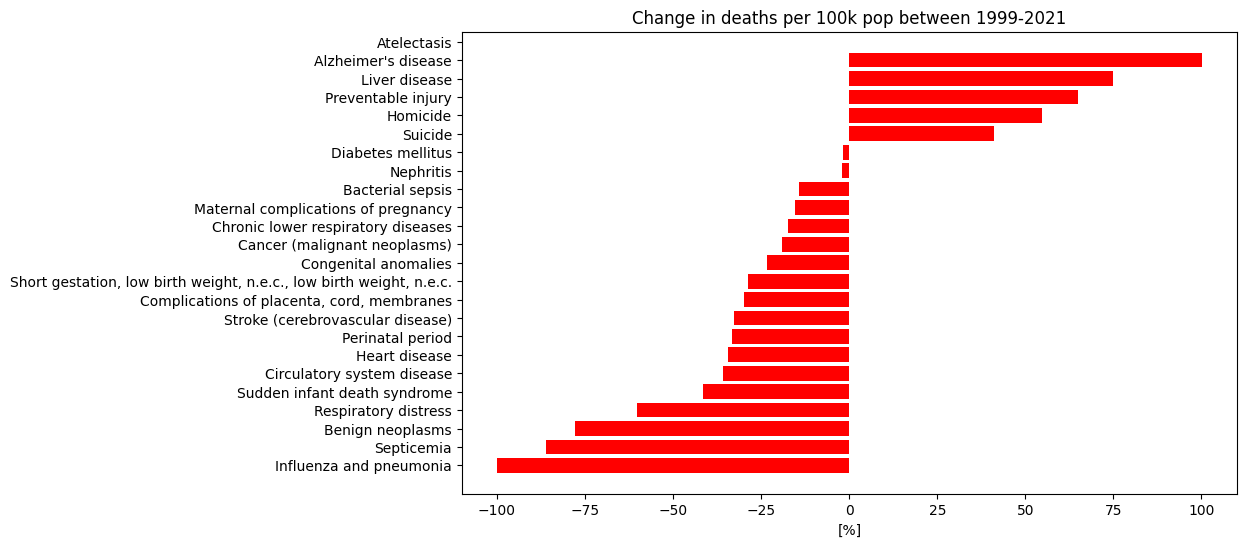

In [49]:
plot_compare_years(cause_of_death_df, 2021, 1999)

In [50]:
preventable_deaths_df = pd.read_excel(prefix+'Leading causes of fatal and nonfatal preventable injuries table.xlsx', 'Deaths',skiprows=[0,3225,3226,3227], usecols=lambda x: 'Unnamed' not in x,)
preventable_deaths_df["Cause of Death"].replace({'MV-Occupant': 'Motor vehicle-Occupant', 'Other Specified (b)' :'Other Specified',
                                                    'Other land transport' : 'Other Land Transport', 'Other transport' : 'Other Transport',
                                                  'Struck by or against' : 'Struck by or Against', 'Other Specified, n.e.c. (a)' : 'Other Specified, NEC'}, inplace=True)
preventable_deaths_df

,Year,Age Group,Rank,Cause of Death,Deaths
0,2021,All Ages,1.0,Poisoning,102001
1,2021,All Ages,2.0,Motor vehicle,46980
2,2021,All Ages,3.0,Fall,44686
3,2021,All Ages,4.0,Suffocation,7182
4,2021,All Ages,5.0,Drowning,4337
...,...,...,...,...,...
3218,1999,All Ages,6.0,Fire/burn,3471
3219,1999,All Ages,7.0,Natural/ Environment,1923
3220,1999,All Ages,8.0,Other Transport,1408
3221,1999,All Ages,9.0,"Other Specified, classifiable",1310


In [51]:
preventable_injuries_df = pd.read_excel(prefix+'Leading causes of fatal and nonfatal preventable injuries table.xlsx', 'Injuries',skiprows=[0,1, 2830,2831,2832], usecols=lambda x: 'Unnamed' not in x,)
preventable_injuries_df.dropna(inplace=True)
preventable_injuries_df["Cause of Injury"].replace({'MV-Occupant': 'Motor vehicle-Occupant', 'Other Specified (b)' :'Other Specified',
                                                    'Other land transport' : 'Other Land Transport', 'Other Transport (c)' : 'Other Transport',
                                                    'Other Bite/Sting (a)' : 'Other Bite/Sting'}, inplace=True)
preventable_injuries_df

,Year,Age Group,Rank,Cause of Injury,Injuries
0,2020,<1 years,1.0,Fall,83049.0
1,2020,<1 years,2.0,Struck By/Against,17162.0
2,2020,<1 years,3.0,Inhalation/Suffocation,9294.0
3,2020,<1 years,4.0,Foreign Body,8326.0
4,2020,<1 years,5.0,Other Specified,6086.0
...,...,...,...,...,...
2815,2001,All ages (d),6.0,Other Bite/Sting,849703.0
2816,2001,All ages (d),7.0,Unknown/Unspecified,829324.0
2817,2001,All ages (d),8.0,Foreign Body,708374.0
2818,2001,All ages (d),9.0,Other Transport,583142.0


In [52]:
def plot_preventable_injuries(dataframe):
    dataframe = dataframe[dataframe['Cause of Injury'] != 'All Causes']
    grouped_df = dataframe.groupby(['Year', 'Cause of Injury'])['Injuries'].sum().unstack()

    last_year = grouped_df.index[-1]
    sorted_columns = grouped_df.loc[last_year-3].sort_values(ascending=False).index

    sorted_df = grouped_df[sorted_columns]

    data = []
    for cause in sorted_df.columns:
        data.append(go.Bar(
            x=sorted_df.index,
            y=sorted_df[cause],
            name=cause
        ))

    layout = go.Layout(
        barmode='stack',
        xaxis=dict(title='Year'),
        yaxis=dict(title='Injuries'),
        title='Preventable causes of injuries in USA 2001-2020'
    )

    fig = go.Figure(data=data, layout=layout)

    fig.show()

In [53]:
plot_preventable_injuries(preventable_injuries_df)

In [54]:
def plot_preventable_deaths(dataframe):
    dataframe = dataframe[dataframe['Cause of Death'] != 'All Causes']
    grouped_df = dataframe.groupby(['Year', 'Cause of Death'])['Deaths'].sum().unstack()

    last_year = grouped_df.index[-1]
    sorted_columns = grouped_df.loc[last_year].sort_values(ascending=False).index

    sorted_df = grouped_df[sorted_columns]

    data = []
    for cause in sorted_df.columns:
        data.append(go.Bar(
            x=sorted_df.index,
            y=sorted_df[cause],
            name=cause
        ))

    layout = go.Layout(
        barmode='stack',
        xaxis=dict(title='Year'),
        yaxis=dict(title='Deaths'),
        title='Preventable causes of death in USA 1999-2021'
    )

    fig = go.Figure(data=data, layout=layout)

    fig.show()

Śmierci którym można było zaradzić na przestrzeni lat 1999-2021

In [55]:
plot_preventable_deaths(preventable_deaths_df)

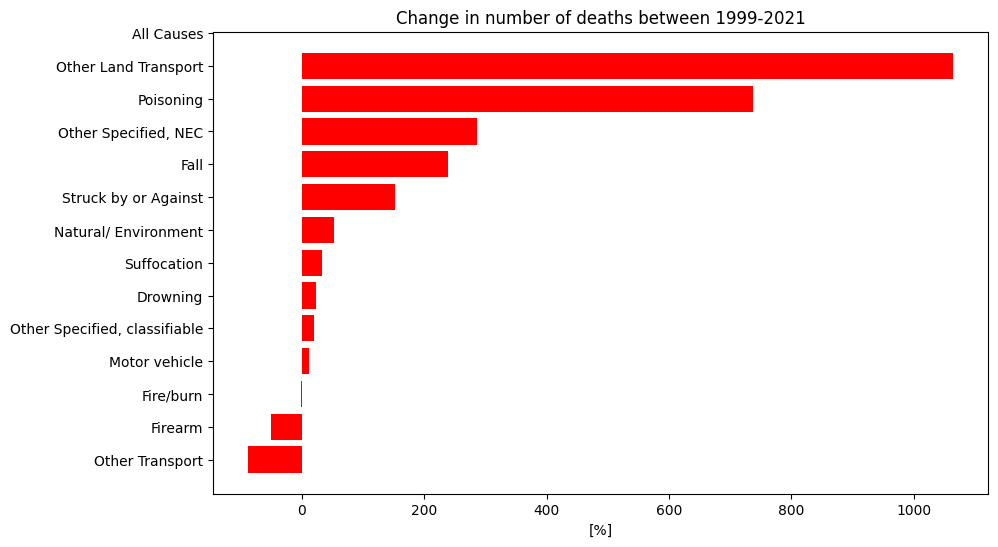

In [56]:
plot_compare_years2(preventable_deaths_df, 2021, 1999)

In [57]:
def plot_preventable_heatmap(dataframe, year):
    dataframe = dataframe[dataframe['Year'] == year]

    grouped_df = dataframe.groupby('Cause of Death')['Deaths'].sum().nlargest(10).index
    dataframe = dataframe[dataframe['Cause of Death'].isin(grouped_df) & (dataframe['Cause of Death'] != 'All Causes')]

    age_group_order = ['<1 years', '1-4 years', '5-9 years','10-14 years' ,'15-24 years', '25-34 years',
                       '35-44 years', '45-54 years', '55-64 years', '65-74 years', '75-84 years', '85+ years']
    dataframe['Age Group'] = pd.Categorical(dataframe['Age Group'], categories=age_group_order, ordered=True)

    dataframe = dataframe.groupby(['Age Group', 'Cause of Death'])['Deaths'].sum().unstack()

    plt.figure(figsize=(10, 6))
    sns.heatmap(dataframe, annot=True, fmt='.0f', cmap=sns.cm.rocket_r)
    plt.title('Preventable Deaths in '+str(year))
    plt.xlabel('Cause of Death')
    plt.ylabel('Age Group')
    plt.show()


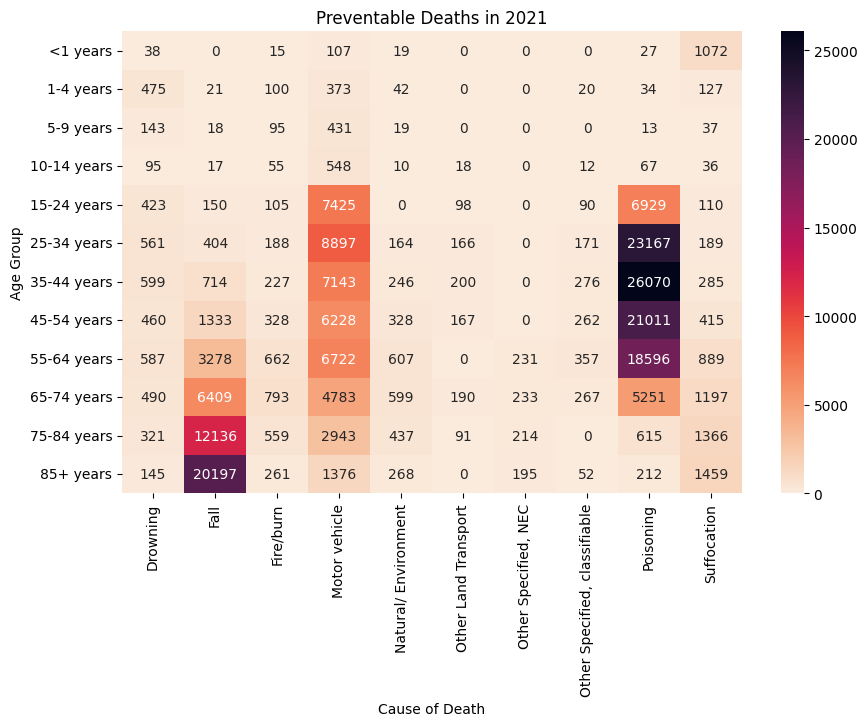

In [58]:
plot_preventable_heatmap(preventable_deaths_df, 2021)